In [ ]:
import numpy as np
import pickle
from pathlib import Path

from IPython.display import display
from lib.util_plot import *
from lib.constants import *
from lib.multilevel_analysis import *
from lib.pandas_impl import *
from lib.pandas_stats_VIS import *
from lib.matrix_analyzer import *
from lib.pandas_compute import *

import lib.FLY_preprocessing.fly_constants as FLY

### Data preparation

In [ ]:
data_folder = Path.cwd() / 'data' / 'FLY'
eval_folder = Path.cwd() / 'data' / 'eval' / 'FLY_24-12-17_25mu'
eval_folder.mkdir(parents=True, exist_ok=True)
plot_folder = eval_folder / "plots"
plot_folder.mkdir(parents=True, exist_ok=True)

In [3]:
filename = eval_folder / "multilevel_analysis.pkl"
with open(filename, 'rb') as file:
    multilevel_analysis = pickle.load(file)

stats = multilevel_analysis.stats
df_summary = multilevel_analysis.df_summary

In [4]:
pre_ids = set(df_summary.index.get_level_values("pre_id_mapped"))
post_ids = set(df_summary.index.get_level_values("post_id_mapped"))
all_ids = pre_ids.union(post_ids)
all_ids.remove(-1)   
no_presynaptic = all_ids - pre_ids

neuron_domain_pre = get_neuron_to_neuron_domain(df_summary, "pre_celltype_merged", "post_celltype_merged", \
                                                 celltype_order=[-1, 1, 2], ignored_neuron_ids=no_presynaptic)
neuron_domain_post = get_neuron_to_neuron_domain(df_summary, "pre_celltype_merged", "post_celltype_merged", \
                                                  celltype_order=[-1, 1, 2], ignored_neuron_ids=no_presynaptic)

In [5]:
initPlotSettings(False)

COLORS_CATEGORICAL_MUTED = sns.color_palette("muted") 
COLORS_CATEGORICAL_DARK = sns.color_palette("dark") 
COLORS_CATEGORICAL_COLORBLIND = sns.color_palette("colorblind") 
COLORS_CATEGORICAL_BRIGHT = sns.color_palette("bright") 
COLORS_CATEGORICAL_PASTEL = sns.color_palette("pastel") 

C_EMPIRICAL = COLORS_CATEGORICAL[2]
C_H0 = COLOR_EMPIRICAL
C_M1 = COLORS_CATEGORICAL_MUTED[7]
C_M2 = COLORS_CATEGORICAL_BRIGHT[7]
C_M3 = COLORS_CATEGORICAL_PASTEL[7]

## Synpapse counts

### E/I

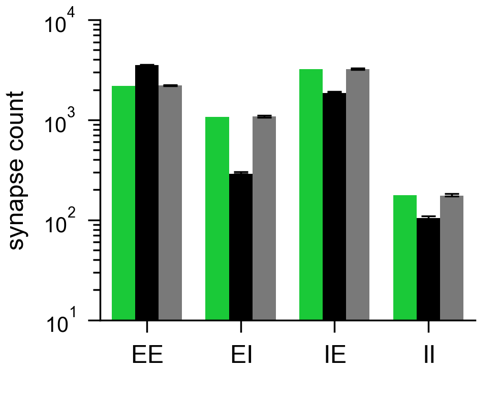

<Figure size 640x480 with 0 Axes>

<Figure size 196.85x157.48 with 0 Axes>

In [6]:
datasets = [stats.to_numpy(SELECTION_CELLTYPE, EMPIRICAL), 
            stats.to_numpy(SELECTION_CELLTYPE, MODEL_NULL),
            stats.to_numpy(SELECTION_CELLTYPE, MODEL_P)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P], 
                     colors=[C_EMPIRICAL, C_H0, C_M1],
                     x_labels=SELECTION_CELLTYPE,
                     y_lim=(10, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.2, fig_size=figsize_mm_to_inch(50,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_POPULATION}.png")
display(img)

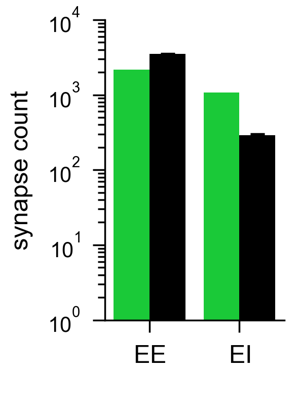

<Figure size 640x480 with 0 Axes>

<Figure size 118.11x157.48 with 0 Axes>

In [7]:
datasets = [stats.to_numpy(SELECTION_CELLTYPE[0:2], EMPIRICAL),
            stats.to_numpy(SELECTION_CELLTYPE[0:2], MODEL_NULL)]

img = plot_bar_chart(datasets,
                     colors=[C_EMPIRICAL, C_H0],
                     x_labels=SELECTION_CELLTYPE[0:2],
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.35, fig_size=figsize_mm_to_inch(30,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_POPULATION}_EXC_model_null.png")
display(img)

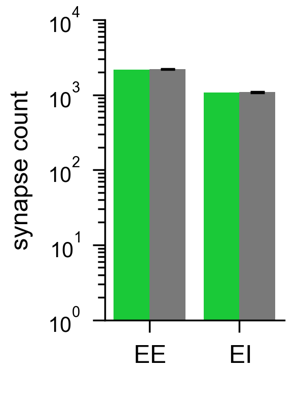

<Figure size 640x480 with 0 Axes>

<Figure size 118.11x157.48 with 0 Axes>

In [8]:
datasets = [stats.to_numpy(SELECTION_CELLTYPE[0:2], EMPIRICAL),
            stats.to_numpy(SELECTION_CELLTYPE[0:2], MODEL_P)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P], 
                     colors=[C_EMPIRICAL, C_M1],
                     x_labels=SELECTION_CELLTYPE[0:2],
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.35, fig_size=figsize_mm_to_inch(30,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_POPULATION}_EXC_model_specificity.png")
display(img)

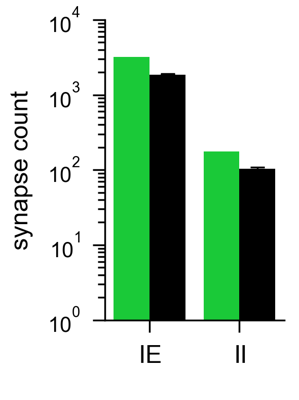

<Figure size 640x480 with 0 Axes>

<Figure size 118.11x157.48 with 0 Axes>

In [9]:
datasets = [stats.to_numpy(SELECTION_CELLTYPE[2:], EMPIRICAL),
            stats.to_numpy(SELECTION_CELLTYPE[2:], MODEL_NULL)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P], 
                     colors=[C_EMPIRICAL, C_H0],
                     x_labels=SELECTION_CELLTYPE[2:],
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.35, fig_size=figsize_mm_to_inch(30,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_POPULATION}_INH_model_null.png")
display(img)

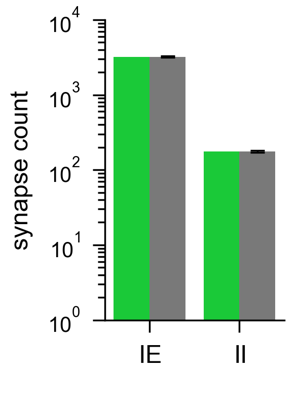

<Figure size 640x480 with 0 Axes>

<Figure size 118.11x157.48 with 0 Axes>

In [10]:
datasets = [stats.to_numpy(SELECTION_CELLTYPE[2:], EMPIRICAL),
            stats.to_numpy(SELECTION_CELLTYPE[2:], MODEL_P)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P], 
                     colors=[C_EMPIRICAL, C_M1],
                     x_labels=SELECTION_CELLTYPE[2:],
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.35, fig_size=figsize_mm_to_inch(30,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_POPULATION}_INH_model_specificity.png")
display(img)

### E/I/U

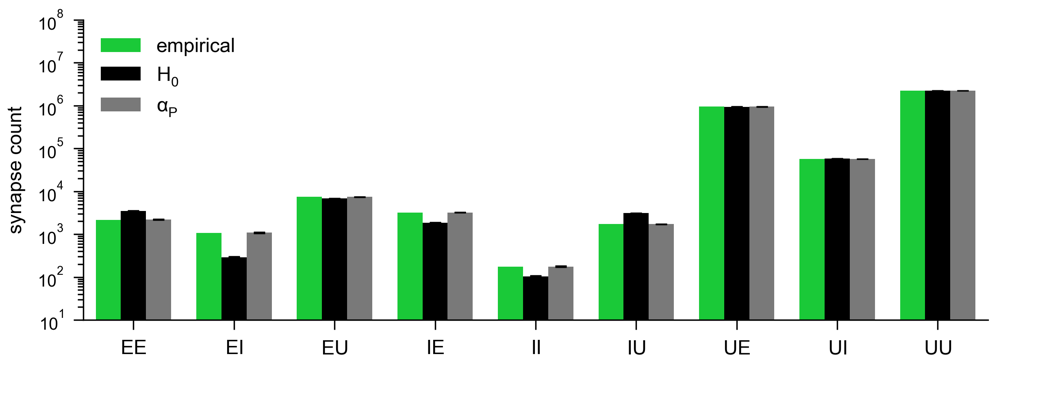

<Figure size 640x480 with 0 Axes>

<Figure size 511.811x196.85 with 0 Axes>

In [11]:
datasets = [stats.to_numpy(SELECTION_CELLTYPE_VIS_ALL, EMPIRICAL), 
            stats.to_numpy(SELECTION_CELLTYPE_VIS_ALL, MODEL_NULL),
            stats.to_numpy(SELECTION_CELLTYPE_VIS_ALL, MODEL_P)]

img = plot_bar_chart(datasets,
                     dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P], 
                     colors=[C_EMPIRICAL, C_H0, C_M1],
                     x_labels=SELECTION_CELLTYPE_VIS_ALL,
                     y_lim=(10, 10**8), use_log=True, error_bars=True,
                     adjust_left=0.08, fig_size=figsize_mm_to_inch(130,50), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_POPULATION}_all.png")
display(img)

### E/I/U specificity

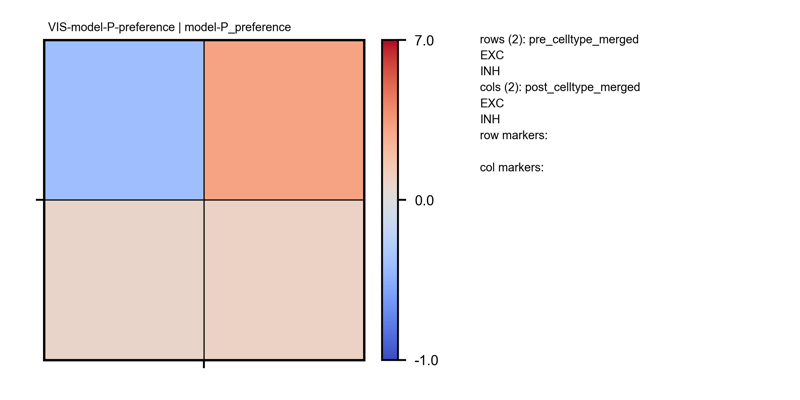

<Figure size 640x480 with 0 Axes>

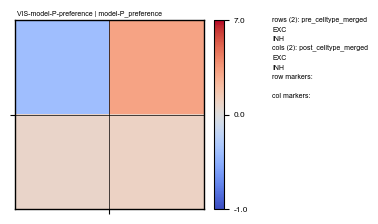

In [12]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection(exclude_filter={})
matrix_analyzer.set_data_columns("model-P_preference")
matrix_analyzer.build_matrix(["pre_celltype_merged"], 
                             ["post_celltype_merged"],    
                             row_domains = VIS.EXC_INH_UNKNOWN[0:2],  
                             col_domains = VIS.EXC_INH_UNKNOWN[0:2],
                             value_label_map = {
                                 "pre_celltype_merged" : VIS.CELLTYPE_LABELS,
                                 "post_celltype_merged" : VIS.CELLTYPE_LABELS,
                             },
                             aggregation_fn="mean",
                             default_value=1)
matrix_analyzer.render_matrix("VIS-model-P-preference", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 8),
                              col_separator_lines=True, row_separator_lines=True, high_res=False)

In [13]:
matrix_analyzer.matrix

array([[0.60402098, 4.14321641],
       [1.73011103, 1.88680922]])

In [14]:
VIS.EXC_INH_UNKNOWN

[1, 2, -1]

In [15]:
df_foo = df_summary.copy().reset_index()
spec_values = df_foo[(df_foo.pre_celltype_merged == VIS.EXC_INH_UNKNOWN[0]) & (df_foo.post_celltype_merged == VIS.EXC_INH_UNKNOWN[1])]["model-P_preference"].values

In [16]:
np.mean(spec_values)

4.143216412482158

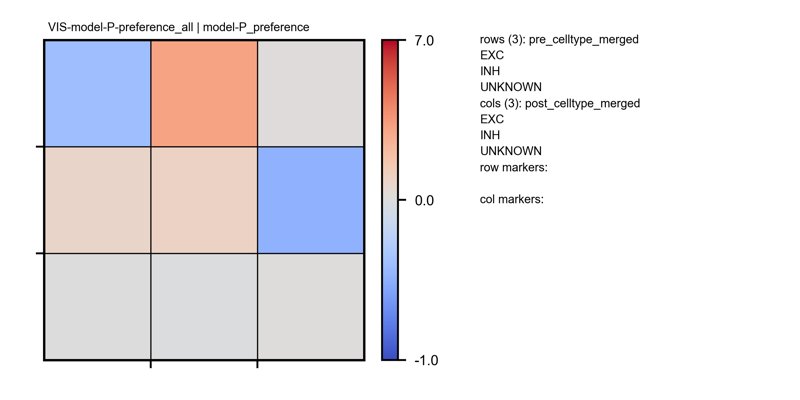

<Figure size 640x480 with 0 Axes>

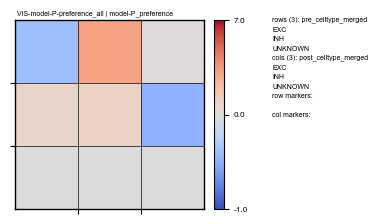

In [17]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection(exclude_filter={})
matrix_analyzer.set_data_columns("model-P_preference")
matrix_analyzer.build_matrix(["pre_celltype_merged"], 
                             ["post_celltype_merged"],    
                             row_domains = VIS.EXC_INH_UNKNOWN,  
                             col_domains = VIS.EXC_INH_UNKNOWN,
                             value_label_map = {
                                 "pre_celltype_merged" : VIS.CELLTYPE_LABELS,
                                 "post_celltype_merged" : VIS.CELLTYPE_LABELS,
                             },
                             aggregation_fn="mean",
                             default_value=1)
matrix_analyzer.render_matrix("VIS-model-P-preference_all", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 8),
                              col_separator_lines=True, row_separator_lines=True, high_res=False)

### E/I by compartment

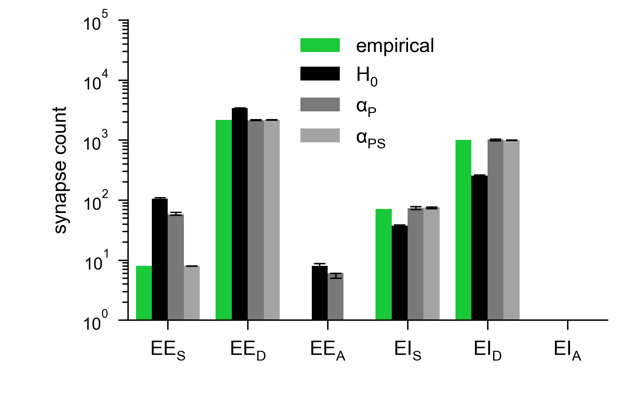

<Figure size 640x480 with 0 Axes>

<Figure size 314.961x196.85 with 0 Axes>

In [18]:
datasets = [stats.to_numpy(SELECTION_EXC_SUBCELLULAR, EMPIRICAL), 
            stats.to_numpy(SELECTION_EXC_SUBCELLULAR, MODEL_NULL),
            stats.to_numpy(SELECTION_EXC_SUBCELLULAR, MODEL_P),
            stats.to_numpy(SELECTION_EXC_SUBCELLULAR, MODEL_PS)]

img = plot_bar_chart(datasets,
                     dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P, STR_PS], 
                     colors=[C_EMPIRICAL, C_H0, C_M1, C_M2],
                     x_labels=SELECTION_EXC_SUBCELLULAR,
                     y_lim=(1, 10**5), use_log=True, error_bars=True,
                     adjust_left=0.2, fig_size=figsize_mm_to_inch(80,50), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_EXC_SUBCELLULAR}.png")
display(img)

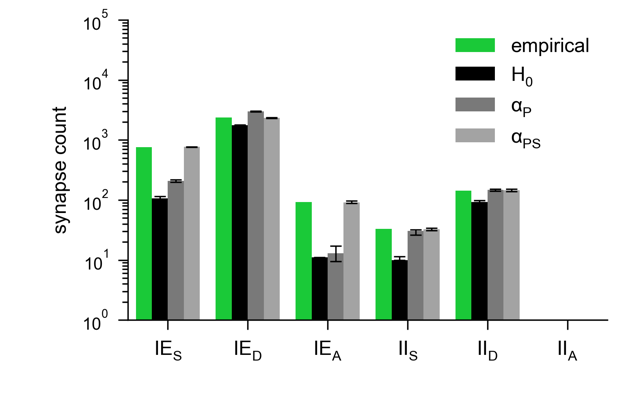

<Figure size 640x480 with 0 Axes>

<Figure size 314.961x196.85 with 0 Axes>

In [19]:
datasets = [stats.to_numpy(SELECTION_INH_SUBCELLULAR, EMPIRICAL), 
            stats.to_numpy(SELECTION_INH_SUBCELLULAR, MODEL_NULL),
            stats.to_numpy(SELECTION_INH_SUBCELLULAR, MODEL_P),
            stats.to_numpy(SELECTION_INH_SUBCELLULAR, MODEL_PS)]

img = plot_bar_chart(datasets,
                     dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P, STR_PS], 
                     colors=[C_EMPIRICAL, C_H0, C_M1, C_M2],
                     x_labels=SELECTION_INH_SUBCELLULAR,
                     y_lim=(1, 10**5), use_log=True, error_bars=True,
                     adjust_left=0.2, fig_size=figsize_mm_to_inch(80,50), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_INH_SUBCELLULAR}.png")
display(img)

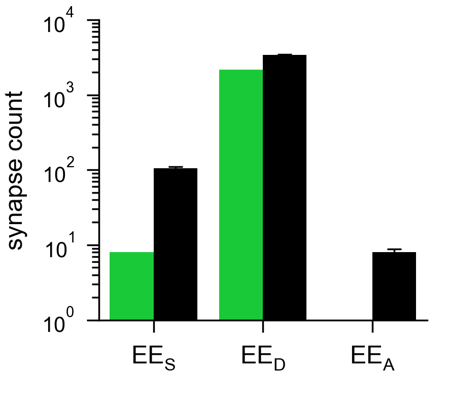

<Figure size 640x480 with 0 Axes>

<Figure size 177.165x157.48 with 0 Axes>

In [20]:
SELECTION_EXC_SUBCELLULAR_3 = SELECTION_EXC_SUBCELLULAR[0:3]

datasets = [stats.to_numpy(SELECTION_EXC_SUBCELLULAR_3, EMPIRICAL), 
            stats.to_numpy(SELECTION_EXC_SUBCELLULAR_3, MODEL_NULL)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL], 
                     colors=[C_EMPIRICAL, C_H0],
                     x_labels=SELECTION_EXC_SUBCELLULAR_3,
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.22, fig_size=figsize_mm_to_inch(45,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_EXC_SUBCELLULAR}_model_null.png")
display(img)

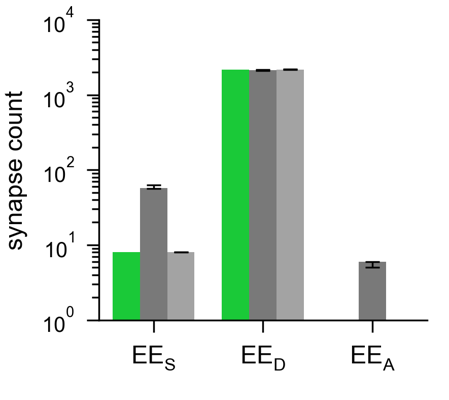

<Figure size 640x480 with 0 Axes>

<Figure size 177.165x157.48 with 0 Axes>

In [21]:
SELECTION_EXC_SUBCELLULAR_3 = SELECTION_EXC_SUBCELLULAR[0:3]

datasets = [stats.to_numpy(SELECTION_EXC_SUBCELLULAR_3, EMPIRICAL), 
            stats.to_numpy(SELECTION_EXC_SUBCELLULAR_3, MODEL_P),
            stats.to_numpy(SELECTION_EXC_SUBCELLULAR_3, MODEL_PS)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL], 
                     colors=[C_EMPIRICAL, C_M1, C_M2],
                     x_labels=SELECTION_EXC_SUBCELLULAR_3,
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.22, fig_size=figsize_mm_to_inch(45,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_EXC_SUBCELLULAR}_model_specificity.png")
display(img)

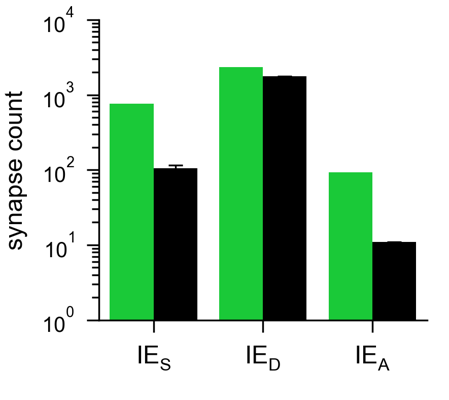

<Figure size 640x480 with 0 Axes>

<Figure size 177.165x157.48 with 0 Axes>

In [22]:
SELECTION_INH_SUBCELLULAR_3 = SELECTION_INH_SUBCELLULAR[0:3]

datasets = [stats.to_numpy(SELECTION_INH_SUBCELLULAR_3, EMPIRICAL), 
            stats.to_numpy(SELECTION_INH_SUBCELLULAR_3, MODEL_NULL)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P, STR_PS], 
                     colors=[C_EMPIRICAL, C_H0],
                     x_labels=SELECTION_INH_SUBCELLULAR_3,
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.22, fig_size=figsize_mm_to_inch(45,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_INH_SUBCELLULAR}_model_null.png")
display(img)

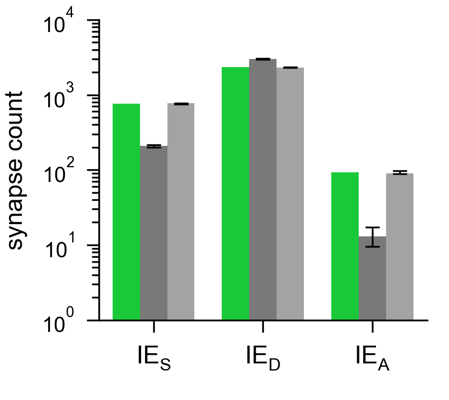

<Figure size 640x480 with 0 Axes>

<Figure size 177.165x157.48 with 0 Axes>

In [23]:
SELECTION_INH_SUBCELLULAR_3 = SELECTION_INH_SUBCELLULAR[0:3]

datasets = [stats.to_numpy(SELECTION_INH_SUBCELLULAR_3, EMPIRICAL), 
            stats.to_numpy(SELECTION_INH_SUBCELLULAR_3, MODEL_P),
            stats.to_numpy(SELECTION_INH_SUBCELLULAR_3, MODEL_PS)]

img = plot_bar_chart(datasets,
                     #dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P, STR_PS], 
                     colors=[C_EMPIRICAL, C_M1, C_M2],
                     x_labels=SELECTION_INH_SUBCELLULAR_3,
                     y_lim=(1, 10**4), use_log=True, error_bars=True,
                     adjust_left=0.22, fig_size=figsize_mm_to_inch(45,40), 
                     filename=plot_folder/f"VIS_{SYNCOUNT_INH_SUBCELLULAR}_model_specificity.png")
display(img)

### E/I specificity by compartment

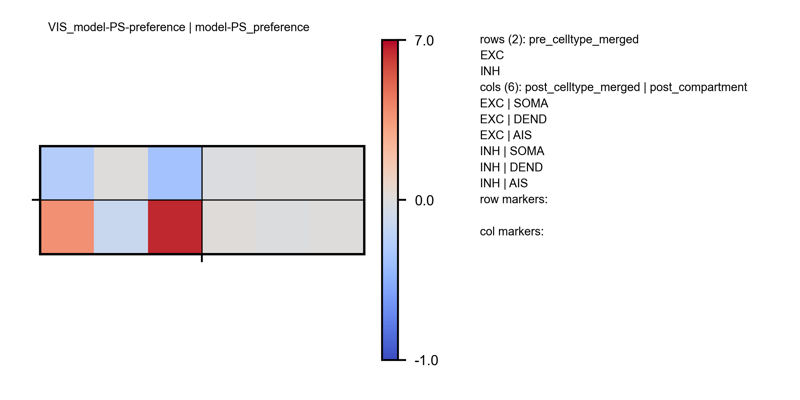

<Figure size 640x480 with 0 Axes>

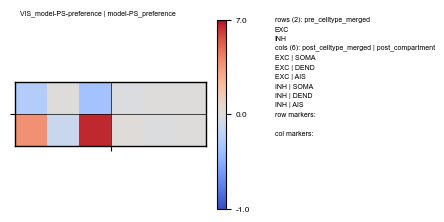

In [24]:
matrix_analyzer = ConnectomeMatrixAnalyzer(df_summary, plot_folder)
matrix_analyzer.set_selection(exclude_filter={})
matrix_analyzer.set_data_columns("model-PS_preference")
matrix_analyzer.build_matrix(["pre_celltype_merged"], 
                             ["post_celltype_merged", "post_compartment"], 
                             row_domains = VIS.EXC_INH_UNKNOWN[0:2],  
                             col_domains = [(1, *VIS.SOMA), (1, *VIS.DEND), (1, *VIS.AIS), (2, *VIS.SOMA), (2, *VIS.DEND), (2, *VIS.AIS)], 
                             value_label_map = {
                                 "pre_celltype_merged" : VIS.CELLTYPE_LABELS,
                                 "post_celltype_merged" : VIS.CELLTYPE_LABELS,
                                 "post_compartment" : VIS.COMPARTMENT_LABELS,
                             },
                             aggregation_fn="mean",
                             default_value=1)
matrix_analyzer.render_matrix("VIS_model-PS-preference", 
                              colormap_name="coolwarm", vmin=-1, vmax=1, normalization_function=NormalizePreferenceValue(0, 8),
                              col_separator_lines=True, row_separator_lines=True)

## Synapse clusters

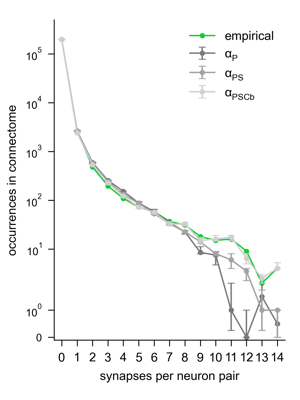

<Figure size 640x480 with 0 Axes>

<Figure size 236.221x314.961 with 0 Axes>

In [25]:
dataset_labels = [STR_EMPIRICAL, STR_P, STR_PS, STR_PSCb]

SELECTION_CLUSTER_15 = SELECTION_CLUSTER[0:15]

datasets = [stats.to_numpy(SELECTION_CLUSTER_15, EMPIRICAL), 
            stats.to_numpy(SELECTION_CLUSTER_15, MODEL_P_disaggregated),
            stats.to_numpy(SELECTION_CLUSTER_15, MODEL_PS_disaggregated),
            stats.to_numpy(SELECTION_CLUSTER_15, MODEL_PSCb)]

labels = [l.split("-")[1] for l in SELECTION_CLUSTER_15]
        
filename = plot_folder/f"VIS_{SYNCLUSTERS}_model_specificity.png"
img = plot_line_chart(datasets, x_labels=labels, linestyles=[".-",".-",".-", ".-"],
                      colors=[C_EMPIRICAL, C_M1, C_M2, C_M3], y_lim=(-0.1, 0.5 * 10**6), capsize=2, linewidth=0.8, marker_size=4,       
    dataset_labels=dataset_labels, error_bars=True, use_log=True, hline_y=None,  adjust_left=0.18, adjust_bottom=0.15, fig_size=figsize_mm_to_inch(60,80), filename=filename)
display(img)

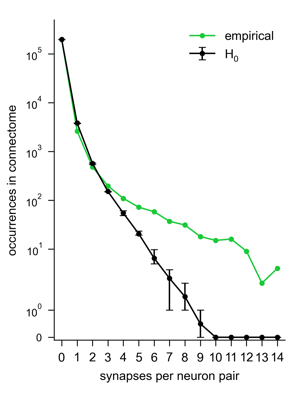

<Figure size 640x480 with 0 Axes>

<Figure size 236.221x314.961 with 0 Axes>

In [26]:
dataset_labels = [STR_EMPIRICAL, STR_NULL]

datasets = [stats.to_numpy(SELECTION_CLUSTER_15, EMPIRICAL), 
            stats.to_numpy(SELECTION_CLUSTER_15, MODEL_NULL)]

labels = [l.split("-")[1] for l in SELECTION_CLUSTER_15]
        
filename = plot_folder/f"VIS_{SYNCLUSTERS}_empirical-null.png"
img = plot_line_chart(datasets, x_labels=labels, linestyles=[".-",".-"],
                      colors=[C_EMPIRICAL, C_H0], y_lim=(-0.1, 0.5 * 10**6), capsize=2, linewidth=0.8, marker_size=4,       
    dataset_labels=dataset_labels, error_bars=True, use_log=True, hline_y=None,  adjust_left=0.18, adjust_bottom=0.15, fig_size=figsize_mm_to_inch(60,80), filename=filename)
display(img)

## Triplet motifs

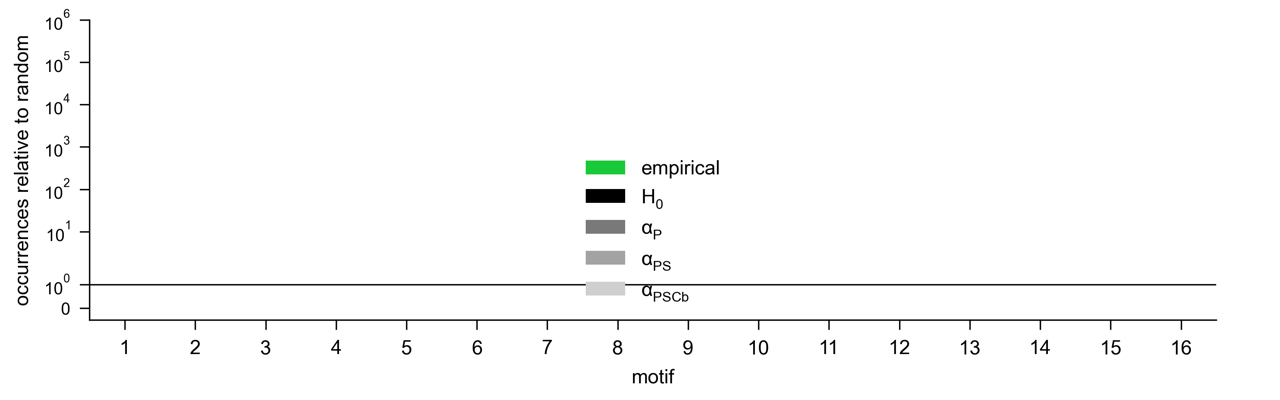

<Figure size 640x480 with 0 Axes>

<Figure size 629.922x196.85 with 0 Axes>

In [27]:
dataset_labels = [STR_EMPIRICAL, STR_NULL, STR_P, STR_PS, STR_PSCb]

datasets = [stats.to_numpy(SELECTION_MOTIF, EMPIRICAL), 
            stats.to_numpy(SELECTION_MOTIF, MODEL_NULL),
            stats.to_numpy(SELECTION_MOTIF, MODEL_P),
            stats.to_numpy(SELECTION_MOTIF, MODEL_PS_disaggregated),
            stats.to_numpy(SELECTION_MOTIF, MODEL_PSCb)]

datasets_null_model = [stats.to_numpy(SELECTION_MOTIF, EMPIRICAL), 
            stats.to_numpy(SELECTION_MOTIF, MODEL_NULL)]

datasets_specificity_models = [stats.to_numpy(SELECTION_MOTIF, EMPIRICAL), 
            stats.to_numpy(SELECTION_MOTIF, MODEL_P),
            stats.to_numpy(SELECTION_MOTIF, MODEL_PS_disaggregated),
            stats.to_numpy(SELECTION_MOTIF, MODEL_PSCb)]

filename = plot_folder/f"VIS_{MOTIFS}.png"
img = plot_motifs_bar_chart(datasets, 
    colors = [C_EMPIRICAL, C_H0, C_M1, C_M2, C_M3],
    dataset_labels=dataset_labels, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4, capsize=0, y_axis_label="occurrences relative to random",
    error_bars=True, y_lim=(-0.5,10**6), use_log=True, fig_size=figsize_mm_to_inch(160,50), adjust_left=0.07, filename=filename)
display(img)

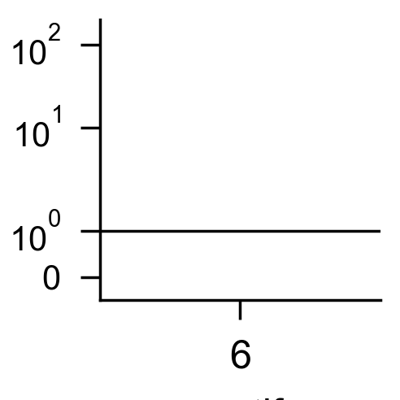

<Figure size 640x480 with 0 Axes>

<Figure size 98.4252x98.4252 with 0 Axes>

In [28]:
selected_id = 6
    
filename = plot_folder/f"VIS_{MOTIFS}_selected_{selected_id}_model_null.png"
img = plot_motifs_bar_chart(datasets_null_model, 
    selected_motifs=(selected_id,),
    colors = [C_EMPIRICAL, C_H0],
    dataset_labels=None, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4.5, capsize=0, y_axis_label="occurrences relative to random", adjust_bottom=0.25,
    error_bars=True, y_lim=(-0.5,2*10**2), use_log=True, fig_size=figsize_mm_to_inch(25,25), adjust_left=0.25, filename=filename)
display(img)

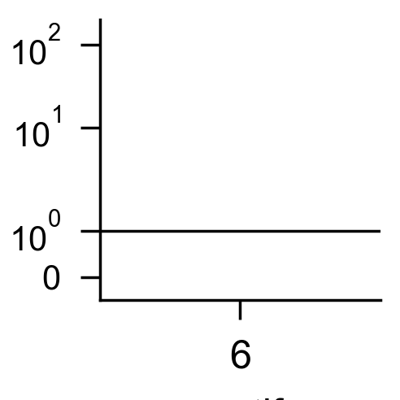

<Figure size 640x480 with 0 Axes>

<Figure size 98.4252x98.4252 with 0 Axes>

In [29]:
selected_id = 6
    
filename = plot_folder/f"VIS_{MOTIFS}_selected_{selected_id}_model_specificity.png"
img = plot_motifs_bar_chart(datasets_specificity_models, 
    selected_motifs=(selected_id,),
    colors = [C_EMPIRICAL, C_M1, C_M2, C_M3],
    dataset_labels=None, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4.5, capsize=0, y_axis_label="occurrences relative to random", adjust_bottom=0.25,
    error_bars=True, y_lim=(-0.5,2*10**2), use_log=True, fig_size=figsize_mm_to_inch(25,25), adjust_left=0.25, filename=filename)
display(img)

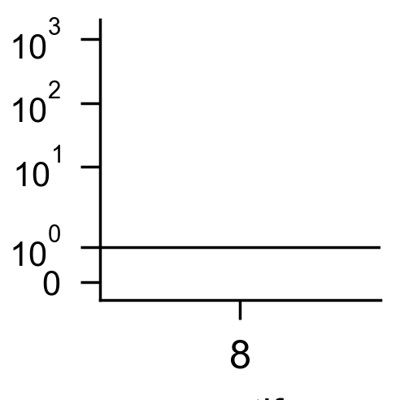

<Figure size 640x480 with 0 Axes>

<Figure size 98.4252x98.4252 with 0 Axes>

In [30]:
selected_id = 8
    
filename = plot_folder/f"VIS_{MOTIFS}_selected_{selected_id}_model_null.png"
img = plot_motifs_bar_chart(datasets_null_model, 
    selected_motifs=(selected_id,),
    colors = [C_EMPIRICAL, C_H0],
    dataset_labels=None, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4.5, capsize=0, y_axis_label="occurrences relative to random", adjust_bottom=0.25,
    error_bars=True, y_lim=(-0.5,2*10**3), use_log=True, fig_size=figsize_mm_to_inch(25,25), adjust_left=0.25, filename=filename)
display(img)

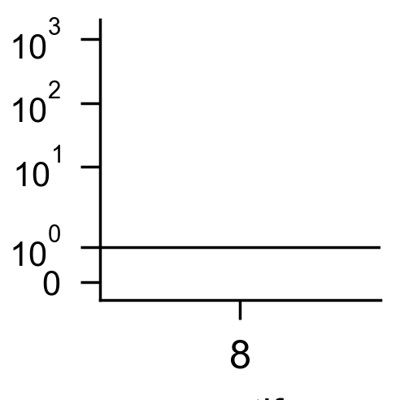

<Figure size 640x480 with 0 Axes>

<Figure size 98.4252x98.4252 with 0 Axes>

In [31]:
selected_id = 8
    
filename = plot_folder/f"VIS_{MOTIFS}_selected_{selected_id}_model_specificity.png"
img = plot_motifs_bar_chart(datasets_specificity_models, 
    selected_motifs=(selected_id,),
    colors = [C_EMPIRICAL, C_M1, C_M2, C_M3],
    dataset_labels=None, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4.5, capsize=0, y_axis_label="occurrences relative to random", adjust_bottom=0.25,
    error_bars=True, y_lim=(-0.5,2*10**3), use_log=True, fig_size=figsize_mm_to_inch(25,25), adjust_left=0.25, filename=filename)
display(img)

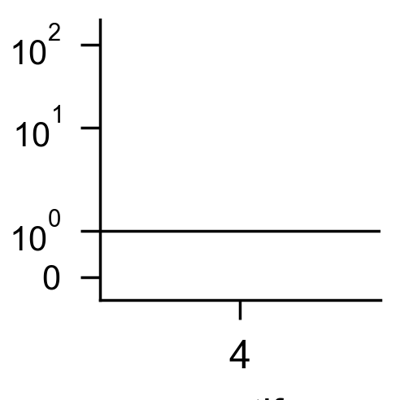

<Figure size 640x480 with 0 Axes>

<Figure size 98.4252x98.4252 with 0 Axes>

In [32]:
selected_id = 4
    
filename = plot_folder/f"VIS_{MOTIFS}_selected_{selected_id}_model_null.png"
img = plot_motifs_bar_chart(datasets_null_model, 
    selected_motifs=(selected_id,),
    colors = [C_EMPIRICAL, C_H0],
    dataset_labels=None, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4.5, capsize=0, y_axis_label="occurrences relative to random", adjust_bottom=0.25,
    error_bars=True, y_lim=(-0.5,2*10**2), use_log=True, fig_size=figsize_mm_to_inch(25,25), adjust_left=0.25, filename=filename)
display(img)

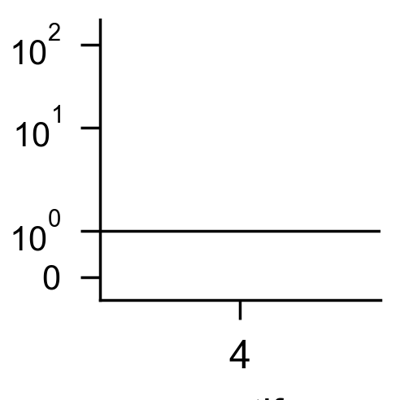

<Figure size 640x480 with 0 Axes>

<Figure size 98.4252x98.4252 with 0 Axes>

In [33]:
selected_id = 4
    
filename = plot_folder/f"VIS_{MOTIFS}_selected_{selected_id}_model_specificity.png"
img = plot_motifs_bar_chart(datasets_specificity_models, 
    selected_motifs=(selected_id,),
    colors = [C_EMPIRICAL, C_M1, C_M2, C_M3],
    dataset_labels=None, quantile_low=25, quantile_high=75,
    use_mean=False, marker_size=4.5, capsize=0, y_axis_label="occurrences relative to random", adjust_bottom=0.25,
    error_bars=True, y_lim=(-0.5,2*10**2), use_log=True, fig_size=figsize_mm_to_inch(25,25), adjust_left=0.25, filename=filename)
display(img)